In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking/hotel_booking.csv


In [2]:
bookings = pd.read_csv("/kaggle/input/hotel-booking/hotel_booking.csv")

In [3]:
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
bookings = bookings.drop(columns=['name', 'email', 'phone-number', 'credit_card', 'agent', 'company', 'babies'])
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
bookings = bookings.drop(columns=['arrival_date_year', 'arrival_date_day_of_month'])


In [7]:
bookings.isna().sum()


hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
arrival_date_week_number            0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
reservation_

In [8]:
bookings['country'] = bookings['country'].replace(np.NaN, 'OTHER')
bookings['country'].isna().sum()

0

<AxesSubplot:ylabel='reservation_status'>

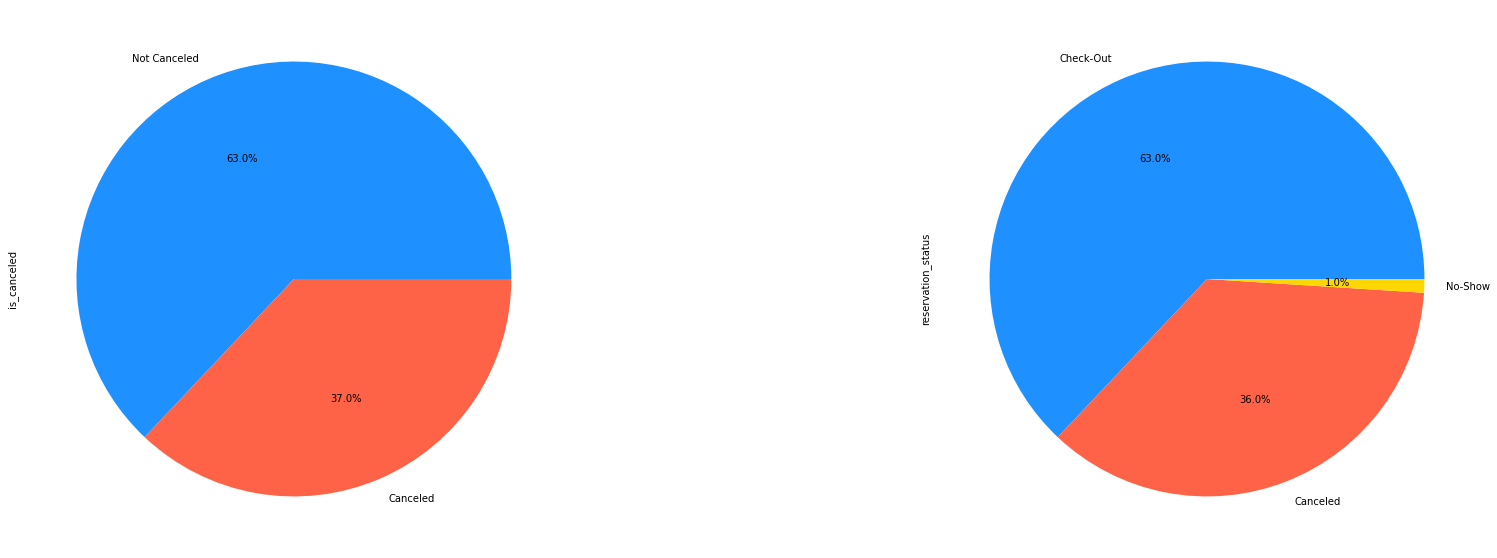

In [9]:
f,ax=plt.subplots(1,2,figsize=(30,10))
bookings['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], colors=['dodgerblue', 'tomato'], labels=['Not Canceled', 'Canceled'])
bookings['reservation_status'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], colors=['dodgerblue', 'tomato', 'gold'])

In [10]:
# Funciones Auxiliares

def get_column_per_mean_adr(dataset, column):
    median = dict()
    for _column in dataset[column].unique():
        median[_column] = dataset[dataset[column] == _column]['adr'].median()
    return median

def Average(lst):
    return sum(lst) / len(lst)



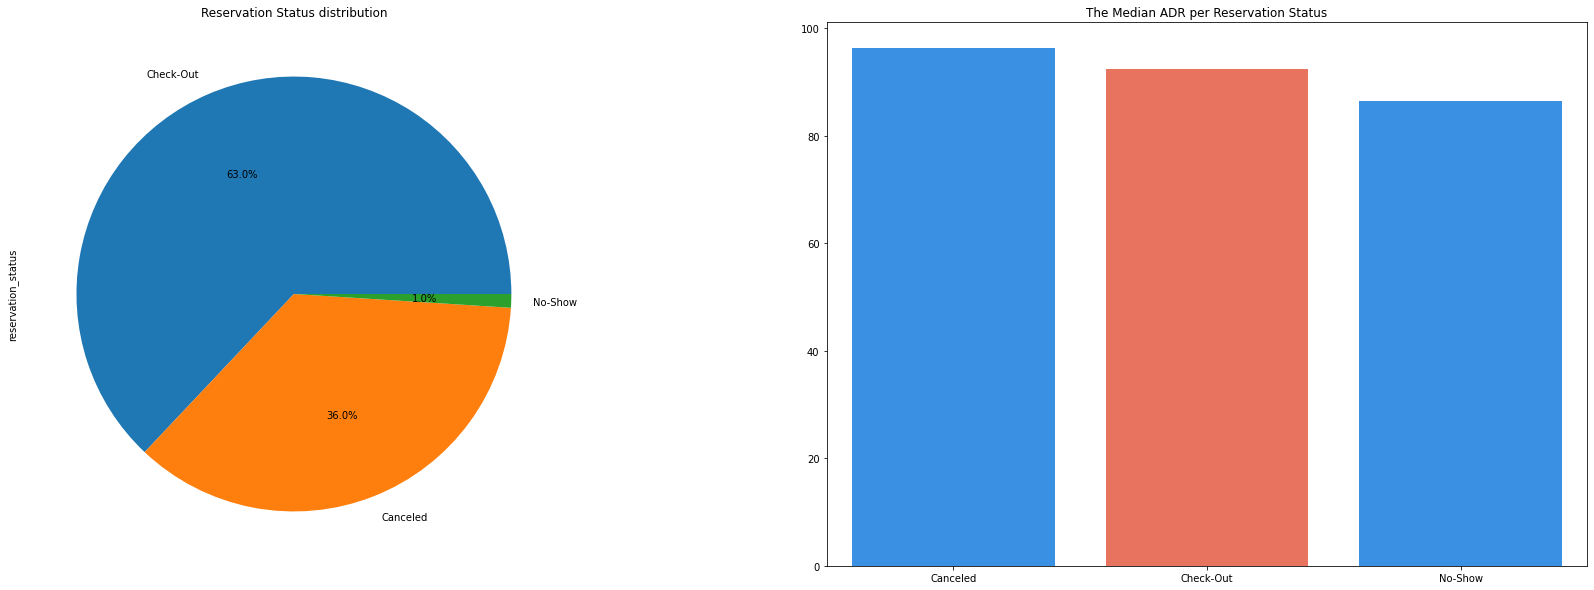

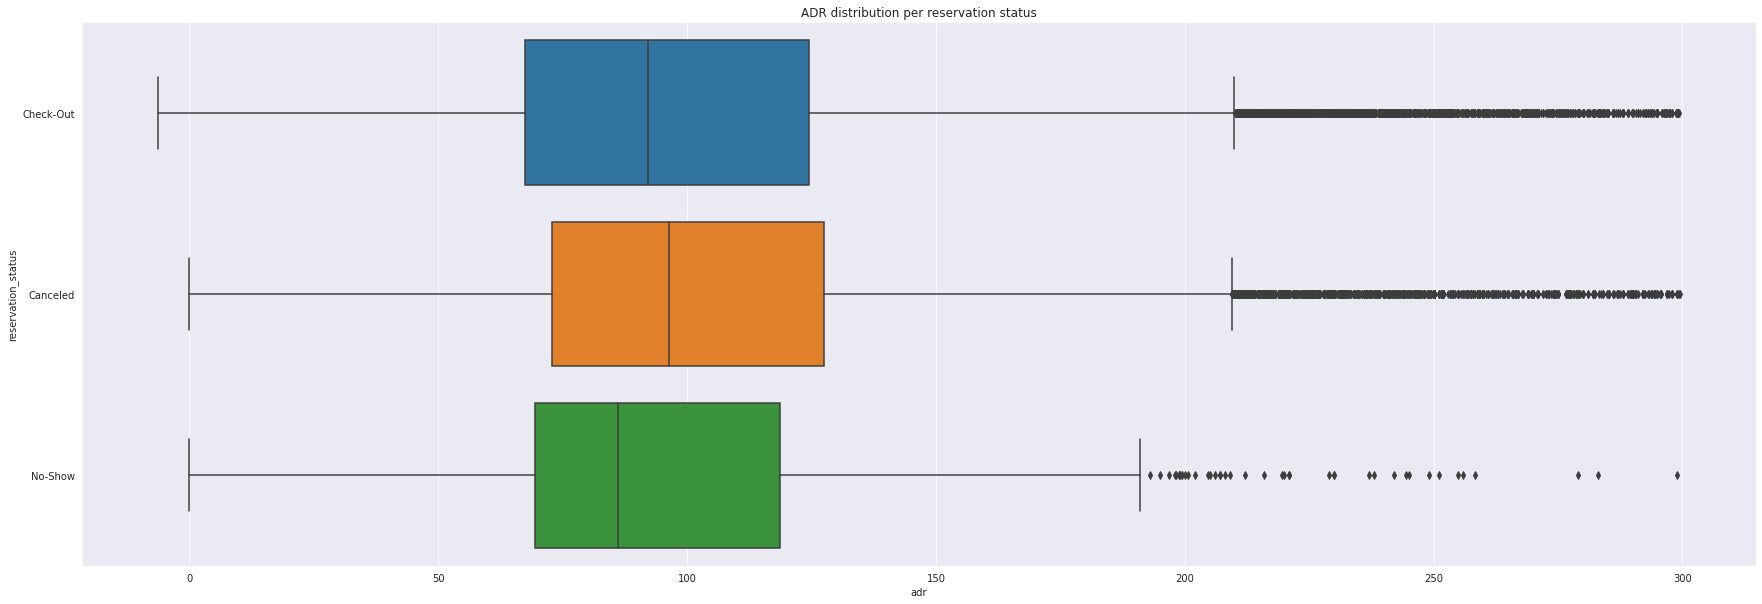

In [11]:
f,ax=plt.subplots(1,2,figsize=(30,10))
bookings['reservation_status'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])

medians_reservation_status = get_column_per_mean_adr(bookings, 'reservation_status')
medians_reservation_status = dict(sorted(medians_reservation_status.items(), key=lambda item: item[1], reverse=True))
sns.barplot(x=list(medians_reservation_status.keys()), y=list(medians_reservation_status.values()), palette=['dodgerblue', 'tomato'], ax=ax[1])
ax[1].set_title("The Median ADR per Reservation Status")
ax[0].set_title("Reservation Status distribution")
plt.show()

plt.figure(figsize=(30,10))
sns.set_style("darkgrid")
sns.boxplot(data=bookings[bookings['adr'] < 300], y='reservation_status', x='adr')
plt.title("ADR distribution per reservation status")
plt.show()

In [12]:
bookings = bookings.drop(columns=['adr'])

In [13]:
booking_numeric_variables = booking_numeric_variables.drop(columns=['is_repeated_guest', 'is_canceled'])

NameError: name 'booking_numeric_variables' is not defined

In [ ]:
corr_matrix = booking_numeric_variables.corr()

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr_matrix, vmin=-0.5, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.xticks(rotation=45)
plt.show()

In [ ]:
for column in booking_numeric_variables.columns:
    print(column)

In [ ]:
bookings['are_previous_cancellations'] = bookings['previous_cancellations'] > 0
bookings['are_previous_bookings'] = bookings['previous_bookings_not_canceled'] > 0

In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,10))
bookings[bookings['is_canceled'] == 1]['are_previous_cancellations'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], colors=['springgreen', 'tomato'])
ax[0].set_title("Canceled reservations with previous cancellations")
bookings[bookings['is_canceled'] == 0]['are_previous_cancellations'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], colors=['springgreen', 'tomato'])
ax[1].set_title("Check-out status reservations with previous cancellations")
ax[1].set_ylabel("")
ax[0].set_ylabel("")


In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,10))
bookings[bookings['is_canceled'] == 1]['are_previous_bookings'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], colors=['dodgerblue', 'tomato'])
ax[0].set_title("Had any previous successful Check-out bookings?")
ax[0].set_xlabel("Cancelled reservations")
ax[0].set_ylabel("")
bookings[bookings['is_canceled'] == 0]['are_previous_bookings'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], colors=['dodgerblue', 'tomato'])
ax[1].set_title("Had any previous successful Check-out bookings?")
ax[1].set_xlabel("Check-out Reservations")
ax[1].set_ylabel("")


In [ ]:
"""
plt.figure(figsize=(20, 10))
sns.boxplot(x=bookings['reservation_status'], y=bookings['stays_in_week_nights'])
plt.ylim([-2, 15])
"""
f,ax=plt.subplots(1,2,figsize=(30,10))
sns.boxplot(y=bookings['reservation_status'], x=bookings['stays_in_week_nights'], color="dodgerblue", ax=ax[0])
sns.violinplot(y=bookings['reservation_status'], x=bookings['stays_in_week_nights'], color='tomato', ax=ax[1])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,10))
sns.boxplot(y=bookings['reservation_status'], x=bookings['lead_time'], color="dodgerblue", ax=ax[0])
sns.violinplot(y=bookings['reservation_status'], x=bookings['lead_time'], color='tomato', ax=ax[1])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,10))
sns.boxplot(y=bookings['reservation_status'], x=bookings['arrival_date_week_number'], color="dodgerblue", ax=ax[0])
sns.violinplot(y=bookings['reservation_status'], x=bookings['arrival_date_week_number'], color='tomato', ax=ax[1])

In [ ]:
f,ax=plt.subplots(2,2,figsize=(30,10))
sns.boxplot(y=bookings['reservation_status'], x=bookings['adults'], color="dodgerblue", ax=ax[0, 0])
sns.boxplot(y=bookings['reservation_status'], x=bookings['children'], color='tomato', ax=ax[0, 1])
sns.histplot(x=bookings['adults'], color='springgreen', ax=ax[1,0])
sns.histplot(x=bookings['children'], color='springgreen', ax=ax[1,1])

In [ ]:
f,ax=plt.subplots(1,3,figsize=(30,10))
sns.boxplot(y=bookings['reservation_status'], x=bookings['booking_changes'], color="dodgerblue", ax=ax[0])
sns.violinplot(y=bookings['reservation_status'], x=bookings['booking_changes'], color='tomato', ax=ax[1])
sns.histplot(x=bookings['booking_changes'], color='springgreen', ax=ax[2])

In [ ]:
f,ax=plt.subplots(1,3,figsize=(30,10))
sns.boxplot(y=bookings['reservation_status'], x=bookings['days_in_waiting_list'], color="dodgerblue", ax=ax[0])
sns.violinplot(y=bookings['reservation_status'], x=bookings['days_in_waiting_list'], color='tomato', ax=ax[1])
ax[1].set_xlim([-10, 50])
sns.histplot(x=bookings['days_in_waiting_list'], color='springgreen', ax=ax[2])

In [ ]:
f,ax=plt.subplots(1,3,figsize=(30,10))
sns.boxplot(y=bookings['reservation_status'], x=bookings['required_car_parking_spaces'], color="dodgerblue", ax=ax[0])
sns.violinplot(y=bookings['reservation_status'], x=bookings['required_car_parking_spaces'], color='tomato', ax=ax[1])
ax[1].set_xlim([-10, 50])
sns.histplot(x=bookings['required_car_parking_spaces'], color='springgreen', ax=ax[2])

In [ ]:
f,ax=plt.subplots(1,3,figsize=(30,10))
sns.boxplot(y=bookings['reservation_status'], x=bookings['total_of_special_requests'], color="dodgerblue", ax=ax[0])
sns.violinplot(y=bookings['reservation_status'], x=bookings['total_of_special_requests'], color='tomato', ax=ax[1])
ax[1].set_xlim([-10, 50])
sns.histplot(x=bookings['total_of_special_requests'], color='springgreen', ax=ax[2])

In [ ]:
bookings['is_canceled'].loc[bookings['is_canceled'] == True] = 'Canceled'
bookings['is_canceled'].loc[bookings['is_canceled'] == False] = 'Check-out'



## 

In [ ]:
countries = bookings['country'].value_counts()[:20].index
top_25_countries_dataset = bookings[bookings['country'].isin(countries)]

In [ ]:
top_25_countries_dataset.head()

In [ ]:
plt.figure(figsize=(20, 10))
g = sns.countplot(x="country", hue="is_canceled", data=top_25_countries_dataset)


In [ ]:
plt.figure(figsize=(20, 10))
g = sns.countplot(hue="country", x=top_25_countries_dataset[top_25_countries_dataset["is_canceled"] == "Canceled"]['is_canceled'], data=top_25_countries_dataset)

In [ ]:
canceled_count = top_25_countries_dataset[top_25_countries_dataset["country"] == "PRT"]['is_canceled'].value_counts()

In [ ]:
def get_most_canceled_countries_pctg(booking):
    cancelations_per_country = dict()
    for country in booking.country.unique():
        reservation_status = booking[booking["country"] == country]['is_canceled'].value_counts()
        cancelations_per_country[country] = round(((reservation_status['Canceled'] / (reservation_status['Canceled'] + reservation_status['Check-out'])) * 100), 2)
    return dict(sorted(cancelations_per_country.items(), key=lambda item: item[1], reverse=True))

In [ ]:
def get_most_canceled_ptg_per_column(booking, column, is_canceled=True):
    cancelations_per_country = dict()
    for item in booking[column].unique():
        reservation_status = booking[booking[column] == item]['is_canceled'].value_counts()
        try:
            if is_canceled:
                cancelations_per_country[item] = round(((reservation_status['Canceled'] / (reservation_status['Canceled'] + reservation_status['Check-out'])) * 100), 2)
            else:
                cancelations_per_country[item] = round(((reservation_status['Check-out'] / (reservation_status['Canceled'] + reservation_status['Check-out'])) * 100), 2)
        except:
            cancelations_per_country[item] = 0
    return dict(sorted(cancelations_per_country.items(), key=lambda item: item[1], reverse=True))

In [ ]:
bookings['country'].shape[0]

In [ ]:
cancelations_per_country = get_most_canceled_countries_pctg(top_25_countries_dataset)

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x=list(cancelations_per_country.keys()), y=list(cancelations_per_country.values()), color='red')
plt.title("Paises con mayor porcentaje de cancelaciones")
plt.legend(cancelations_per_country.values())

In [ ]:
plt.figure(figsize=(30, 10))
sns.boxplot(x=top_25_countries_dataset['country'], y=top_25_countries_dataset['lead_time'], color="dodgerblue")


In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,10))
sns.countplot( x=top_25_countries_dataset['reserved_room_type'], palette=['dodgerblue'], ax=ax[0])
sns.countplot( x=top_25_countries_dataset['assigned_room_type'], palette=['springgreen'], ax=ax[1])
ax[1].set_title("Assigned Room Type")
ax[0].set_title("Reserved Room Type")
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,10))
sns.countplot(hue=top_25_countries_dataset['is_canceled'], x=top_25_countries_dataset['reserved_room_type'], palette=['dodgerblue', 'tomato'], ax=ax[0])
sns.countplot(hue=top_25_countries_dataset['is_canceled'], x=top_25_countries_dataset['assigned_room_type'], palette=['dodgerblue', 'tomato'], ax=ax[1])
ax[1].set_title("Assigned Room Type")
ax[0].set_title("Reserved Room Type")
ax[0].set_ylim([0, 50000])
ax[1].set_ylim([0, 50000])
plt.show()

In [ ]:
reserved_room_canceled = get_most_canceled_ptg_per_column(top_25_countries_dataset, 'reserved_room_type')
assigned_room_canceled = get_most_canceled_ptg_per_column(top_25_countries_dataset, 'assigned_room_type',)


f,ax=plt.subplots(1,2,figsize=(30,10))
sns.barplot(x=list(reserved_room_canceled.keys()), y=list(reserved_room_canceled.values()), color='dodgerblue', ax=ax[0])
ax[0].set_title("Porcentaje de las reservas elegidas pero canceladas")
ax[0].legend(reserved_room_canceled.values())
ax[0].set_ylim([0,50])

sns.barplot(x=list(assigned_room_canceled.keys()), y=list(assigned_room_canceled.values()), color='springgreen', ax=ax[1])
plt.title("Porcentaje de las reservas asignadas pero canceladas")
plt.legend(assigned_room_canceled.values())
ax[1].set_ylim([0,50])

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot( x=top_25_countries_dataset['customer_type'])

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x=top_25_countries_dataset['customer_type'], hue="is_canceled", data=top_25_countries_dataset, palette=['dodgerblue', 'tomato'])

In [ ]:
customer_type_canceled = get_most_canceled_ptg_per_column(top_25_countries_dataset, 'customer_type')
plt.figure(figsize=(20, 10))
sns.barplot(x=list(customer_type_canceled.keys()), y=list(customer_type_canceled.values()), color='red')
plt.title("Porcentaje de Cancelaciones por tipo de cliente")
plt.legend(customer_type_canceled.values())

In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,10))


sns.countplot( x=top_25_countries_dataset['deposit_type'], hue="is_canceled", data=top_25_countries_dataset, ax=ax[0])

deposit_type_canceled = get_most_canceled_ptg_per_column(top_25_countries_dataset, 'deposit_type')
sns.barplot(x=list(deposit_type_canceled.keys()), y=list(deposit_type_canceled.values()), color='red', ax=ax[1])
ax[1].set_title("Porcentaje de Cancelaciones por tipo de depósito")
ax[1].legend(deposit_type_canceled.values())


In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,10))
sns.countplot( x=top_25_countries_dataset['meal'], hue="is_canceled", data=top_25_countries_dataset, ax=ax[0])
meal_canceled = get_most_canceled_ptg_per_column(top_25_countries_dataset, 'meal')
sns.barplot(x=list(meal_canceled.keys()), y=list(meal_canceled.values()), color='red', ax=ax[1])
ax[1].set_title("Porcentaje de Cancelaciones por tipo de menú")
ax[1].legend(meal_canceled.values())

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(hue="is_repeated_guest", x=top_25_countries_dataset['is_canceled'], data=top_25_countries_dataset)

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x=top_25_countries_dataset['market_segment'], hue="is_canceled", data=top_25_countries_dataset)

In [ ]:
market_segment_canceled = get_most_canceled_ptg_per_column(top_25_countries_dataset, 'market_segment')
market_segment_checkout = get_most_canceled_ptg_per_column(top_25_countries_dataset, 'market_segment', False)

In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,10))

sns.barplot(x=list(market_segment_canceled.keys()), y=list(market_segment_canceled.values()), color='red', ax=ax[0])
ax[0].set_title("Porcentaje de distribución de cancelaciones por segmento de mercado")
ax[0].legend(market_segment_canceled.values())

sns.barplot(x=list(market_segment_checkout.keys()), y=list(market_segment_checkout.values()), color='dodgerblue', ax=ax[1])
plt.title("Porcentaje de distribución de check-outs por segmento de mercado")
plt.legend(market_segment_checkout.values())

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x=top_25_countries_dataset['distribution_channel'], hue="is_canceled", data=top_25_countries_dataset, palette=['dodgerblue', 'red'])

In [ ]:
top_25_countries_dataset = top_25_countries_dataset[top_25_countries_dataset.distribution_channel != 'Undefined']

In [ ]:
dist_channel_canceled = get_most_canceled_ptg_per_column(top_25_countries_dataset, 'distribution_channel')
dist_channel_segment_checkout = get_most_canceled_ptg_per_column(top_25_countries_dataset, 'distribution_channel', False)


In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,10))

sns.barplot(x=list(dist_channel_canceled.keys()), y=list(dist_channel_canceled.values()), color='red', ax=ax[0])
ax[0].set_title("Porcentaje de distribución de cancelaciones por segmento de mercado")
ax[0].legend(dist_channel_canceled.values())
ax[0].set_ylim([0,100])

sns.barplot(x=list(dist_channel_segment_checkout.keys()), y=list(dist_channel_segment_checkout.values()), color='dodgerblue', ax=ax[1])
plt.title("Porcentaje de distribución de check-outs por segmento de mercado")
plt.legend(dist_channel_segment_checkout.values())
ax[1].set_ylim([0,100])


In [ ]:
top5_countries_dataset = top_25_countries_dataset[top_25_countries_dataset['country'].isin(list(['PRT', 'CHN', 'RUS', 'BRA', 'ITA']))]

In [ ]:
plt.figure(figsize=(30, 10))
sns.boxplot(x=top5_countries_dataset['is_canceled'], y=top5_countries_dataset['lead_time'], hue=top5_countries_dataset['country'])
plt.show()

In [ ]:
top5_countries_canceled = top5_countries_dataset[top5_countries_dataset['is_canceled'] == 'Canceled']

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x=top5_countries_dataset['country'], hue=top5_countries_dataset['market_segment'])
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x=top5_countries_canceled['country'], hue=top5_countries_canceled['deposit_type'])
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,10))
sns.countplot(x=top5_countries_canceled['country'], hue=top5_countries_canceled['distribution_channel'], ax=ax[0])
sns.countplot(x=top5_countries_canceled['country'], hue=top5_countries_canceled['customer_type'], ax=ax[1])
plt.show()

# Cleaning Data Pipeline

### Setting the dataset needed to clean the data

In [ ]:
bookings_clean = bookings.copy()

### Remove correlated unnecessary variables

In [ ]:
bookings_clean = bookings_clean.drop(columns=['total_of_special_requests', 'required_car_parking_spaces', 'days_in_waiting_list', 'booking_changes'])
bookings_clean = bookings_clean.drop(columns=['children', 'stays_in_weekend_nights'])

In [ ]:
bookings_clean['is_canceled'].unique()

In [ ]:
bookings_clean['are_previous_cancellations'] = bookings_clean['previous_cancellations'] > 0
bookings_clean['are_previous_cancellations'] = bookings_clean['are_previous_cancellations']
bookings_clean['are_previous_bookings'] = bookings_clean['previous_bookings_not_canceled'] > 0
bookings_clean['are_previous_bookings'] = bookings_clean['are_previous_bookings']


In [ ]:
bookings_clean['are_previous_cancellations'].head()

## Removing all the 'Undefined' values

In [ ]:
bookings_clean = bookings_clean[(bookings_clean['distribution_channel'] != 'Undefined') & (bookings_clean['market_segment'] != 'Undefined')]

## Removing Outliers

In [ ]:
booking_numeric_variables = bookings_clean.select_dtypes(include=numerics)

In [ ]:
def remove_outliers(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    print(Q1)
    print(Q3)
    print(IQR)
    dataset[column] = pd.to_numeric(dataset[column])
    dataset[column] = dataset[(dataset[column] > (Q1 - 1.5 * IQR)) & (dataset[column] <= (Q3 + 1.5 * IQR))][column]
    print(Q1 - 1.5 * IQR)
    print(Q3 + 1.5 * IQR)
    return dataset
    

In [ ]:
bookings_clean = remove_outliers(bookings_clean, 'lead_time')

In [ ]:
bookings_clean = remove_outliers(bookings_clean, 'stays_in_week_nights')    

In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,10))
sns.boxplot(data=bookings_clean, x='lead_time', ax=ax[0])
sns.boxplot(data=bookings_clean, x='stays_in_week_nights', ax=ax[1])
plt.show()

In [ ]:
bookings_clean = remove_outliers(bookings_clean, 'stays_in_week_nights')    

In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,10))
sns.boxplot(data=bookings_clean, x='lead_time', ax=ax[0])
sns.boxplot(data=bookings_clean, x='stays_in_week_nights', ax=ax[1])
plt.show()

# Building the Pipeline and Data Training

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
for column in bookings_clean.columns:
    print(column)

In [ ]:
bookings_prepared = bookings_clean.drop(columns=['previous_cancellations', 'previous_bookings_not_canceled', 'arrival_date_month', 'reservation_status_date', 'is_canceled'])


In [ ]:
X, y = bookings_prepared.drop(columns='reservation_status', axis=1), bookings_prepared['reservation_status']

### Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=123)

In [ ]:
y_train

In [ ]:
numerical_ix = bookings_prepared.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = bookings_prepared.drop(columns='reservation_status').select_dtypes(include=['object', 'bool']).columns

In [ ]:
categorical_ix

In [ ]:
num_transformer = Pipeline(steps=[('imputer', SimpleImputer()), 
                                  ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                  ('onehot', OneHotEncoder(handle_unknown='ignore'))])
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

In [ ]:
t = [('cat', OneHotEncoder(), categorical_ix), ('num', StandardScaler(), numerical_ix)]
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, numerical_ix),
                                               ('cat', cat_transformer, categorical_ix)])

In [ ]:
from sklearn.svm import SVC

In [ ]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', SVC())])


In [ ]:
param_grid = [
    {"classiffier__kernel": ["rbf"], 'classiffier__gamma': ["scale"], "classiffier__C": [1, 10, 100, 1000]},
    {"classiffier__kernel": ["linear"], "classiffier__C": [1, 10, 100, 1000]},
]

randomized_grid = RandomizedSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
randomized_grid.fit(X_train, y_train) 


In [ ]:
plt.figure(figsize = (20,8))
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel', color=prim)
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel', color=ter)

# Enhance the plot
plt.xlabel('Daily Reservation Count')
plt.ylabel('Date of Booking')
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.legend(loc = 'best', labels=['Resort Hotel', 'City Hotel'])

# Display the plot
plt.show

In [ ]:
full_table['reservation_status_month'] = full_table['reservation_status_date'].dt.month

# Set up the plot
plt.figure(figsize = (16, 8))
ax1 = sns.countplot(x = 'reservation_status_month', hue = 'is_canceled', data = full_table, palette = [prim, sec])

# Enhance the plot
plt.legend(loc = 'best', labels=['not cancelled', 'cancelled'])
plt.title('Reservation status per month')
plt.xlabel('Month of Booking')
plt.ylabel('Number of Reservations')

# Display the plot
plt.show

In [ ]:
monthly_cancellations = full_table.groupby(['hotel', 'reservation_status_month'])['is_canceled'].sum().reset_index()

# Set up the plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='reservation_status_month', y='is_canceled', hue='hotel', data=monthly_cancellations, marker='o', palette = [prim, ter])

# Enhance the plot
plt.title('Monthly Cancellation Rate per Hotel', fontsize=16)
plt.xlabel('Month of Cancellation', fontsize=12)
plt.ylabel('Cancellation Rate', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels to make them readable
plt.legend(title='Hotel')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
monthly_adr = full_table[full_table['is_canceled'] == 1].groupby('reservation_status_month')[['adr']].sum().reset_index()
dark_blue_palette = sns.dark_palette("cyan", reverse=True, n_colors=len(monthly_adr))
# Setup plot
plt.figure(figsize = (16, 8))
sns.barplot(x='reservation_status_month', y='adr', data = monthly_adr, palette = dark_blue_palette)

# Enhance the plot
plt.xlabel('Month')
plt.ylabel('ADR')
plt.title('ADR per month', fontsize = 30)

# Display the plot
plt.show

In [ ]:
cancelled_data = full_table[(full_table['is_canceled'] == 1)]
not_cancelled_data = full_table[(full_table['is_canceled'] == 0)]

cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', ascending = True, inplace = True)

not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', ascending = True, inplace = True)

# Visualizing the relation between mean adr and cancellation over months
#Setup plot
plt.figure(figsize = (20, 6))
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')

# Enhance the plot
plt.xlabel('ADR')
plt.ylabel('Date of Booking')
plt.title('Impact of Average Daily Rate on Cancellations', fontsize = 30)
plt.legend()
plt.show()

In [ ]:
cancelled_df_adr.columns

In [ ]:
cancelled_df_adr['reservation_status_date'] = pd.to_datetime(cancelled_df_adr['reservation_status_date'])
not_cancelled_df_adr['reservation_status_date'] = pd.to_datetime(not_cancelled_df_adr['reservation_status_date'])

# Filter data based on the date range
start_date = '2016-01-01'
end_date = '2017-09-01'

cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] > start_date) & 
                                      (cancelled_df_adr['reservation_status_date'] < end_date)]

not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date'] > start_date) & 
                                            (not_cancelled_df_adr['reservation_status_date'] < end_date)]

# Check lengths after filtering
print(f"Cancelled data length: {len(cancelled_df_adr)}")
print(f"Not Cancelled data length: {len(not_cancelled_df_adr)}")
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Setup plot
plt.figure(figsize=(20, 6))

# Plot the data
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='Not Canceled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Canceled')

# Enhance the plot
plt.title('Impact of Average Daily Rate on Cancellations (2016-2017)', fontsize=30)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Daily Rate (ADR)', fontsize=14)
plt.legend()

# Show the plot
plt.show()

In [ ]:
top_10_country = cancelled_data['country'].value_counts()[:10]

# Setup plot
plt.figure(figsize = (5,5))
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)

# Enhance the plot 
plt.title('Top 10 countries with cancelled reservations')

# Show the plot
plt.show()

In [ ]:
full_table['market_segment'].value_counts()

In [ ]:
def evaluate(estimator, x_data, y_data):
    y_pred = estimator.predict(x_data)
    y_proba = estimator.predict_proba(x_data)
    return y_pred, y_proba
def custom_metric(estimator, x_data, y_data):
    y_pred, y_proba = evaluate(estimator, x_data, y_data)
    average = "macro"
    result = {
        "accuracy": accuracy_score(y_data, y_pred),
        "f0.5": fbeta_score(y_data, y_pred, beta=0.5, average=average),
        "f1": fbeta_score(y_data, y_pred, beta=1, average=average),
        "f2": fbeta_score(y_data, y_pred, beta=2, average=average),
        "precision": precision_score(y_data, y_pred, average=average),
        "recall": recall_score(y_data, y_pred, average=average),
        "roc_auc": roc_auc_score(y_data, y_proba, average=average, multi_class="ovo")
    }
    return result

In [ ]:
def train(estimator, param_grid, x_train, y_train):
    gs = GridSearchCV(estimator, param_grid, scoring=custom_metric, refit="f1")
    gs.fit(x_train, y_train)
    return gs
def cv_res_prepare(cv_results):
    cv_results = pd.DataFrame(cv_results)
    columns = []
    for col in cv_results:
        if col.startswith(("param_", "mean_", "rank_")):
            columns.append(col)
    return cv_results[columns]
def plot_graphs(display_cls, bin_y, y_proba, title=None):
    fig, axs = plt.subplots(ncols=3, figsize=(15, 15))
    if title:
        fig.suptitle(title, y=0.625)
    for cls_id in range(3):
        y_tr, y_pr = bin_y[:, cls_id], y_proba[:, cls_id]
        display_cls.from_predictions(y_tr, y_pr, ax=axs[cls_id])
        if cls_id != 0:
            axs[cls_id].axes.get_yaxis().label.set_visible(False)
        if cls_id != 1:
            axs[cls_id].axes.get_xaxis().label.set_visible(False)
def report(grid_search, x_test, y_test):
    cv_results = cv_res_prepare(grid_search.cv_results_)
    
    estimator = grid_search.best_estimator_
    test_results = custom_metric(estimator, x_test, y_test)
    test_results = pd.DataFrame({key: [value] for key, value in test_results.items()})
    y_pred, y_proba = evaluate(estimator, x_test, y_test)
    bin_y = label_binarize(y_test, classes=[0, 1, 2])
    
    print("CV RESULTS")
    display(cv_results)
    print("TEST RESULTS")
    display(test_results)
    
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    disp.ax_.set_title("Confusion Matrix")
    plot_graphs(RocCurveDisplay, bin_y, y_proba, title="Roc Curve")
    plot_graphs(PrecisionRecallDisplay, bin_y, y_proba, title="PR")
        
    return cv_results, test_results


LR

In [ ]:
param_grid = {
    "C": [0.1, 0.5, 1, 10, 100]
}
lr_gs = train(LogisticRegression(max_iter=200), param_grid, X_train, y_train)
lr_cv, lr_test = report(lr_gs, X_test, y_test)

FOREST

In [ ]:
param_grid = {
    "n_estimators": np.arange(10, 301, 50)
}
rf_gs = train(RandomForestClassifier(), param_grid, X_train, y_train)
rf_cv, rf_test = report(rf_gs, X_test, y_test)

KNN

In [ ]:
param_grid = {
    "n_neighbors": np.arange(1, 11, 2)
}
knn_gs = train(KNeighborsClassifier(), param_grid, X_train, y_train)
knn_cv, knn_test = report(knn_gs, X_test, y_test)

test_results = pd.concat([lr_test, rf_test, knn_test]).reset_index(drop=True)
test_results = test_results.rename({0: "LR", 1: "RF", 2: "KNN"})
test_results

SEABORN

In [ ]:
k =25
cols = df.select_dtypes(include=['number']).corr().nlargest(k, 'is_canceled')['is_canceled'].index
cm = np.corrcoef(df[cols].values.T)
print(cols)
sns.heatmap(cm, cbar=True, annot=True, xticklabels=cols.values, yticklabels=cols.values)

In [ ]:
important_features_17 = [ 'lead_time', 'previous_cancellations', 'adults',
       'days_in_waiting_list', 'adr', 'stays_in_week_nights',
       'arrival_date_year', 'arrival_date_week_number', 'children',
       'stays_in_weekend_nights', 'arrival_date_day_of_month',
       'babies', 'previous_bookings_not_canceled',
       'is_repeated_guest', 'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests']
len(important_features_17)

In [ ]:
df['babies'].isnull()

In [ ]:
for a in important_features_17:
  print(f"{a}  {X[a].unique()}\
  \n--------------------------------------------------------------\n\n")

In [ ]:
X = df[important_features_17]
X.info()

In [ ]:
X.isnull().sum()

In [ ]:
X.fillna({'children':1},inplace=True)

In [ ]:
X.isnull().sum()

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
 (MinMaxScaler(),['lead_time', 'previous_cancellations', 'adults',
       'days_in_waiting_list', 'adr', 'stays_in_week_nights',
       'arrival_date_year', 'arrival_date_week_number', 'children',
       'stays_in_weekend_nights', 'arrival_date_day_of_month',
       'babies', 'previous_bookings_not_canceled',
       'is_repeated_guest', 'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests']))

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.1 , random_state = 42)

In [ ]:
X_train.head()

In [ ]:
ct.fit(X_train)

In [ ]:
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)
X_train[5]

In [ ]:
y_train

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(25 , activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'relu'),
    tf.keras.layers.Dense(6 , activation = 'relu'),
    tf.keras.layers.Dense(3 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

In [ ]:
model.compile(loss = "binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,validation_data = (X_test , y_test), epochs = 10,batch_size = 32)

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [ ]:
plt.figure(figsize=(15,75))

for i in range(len(cat_cols)):
    plt.subplot(10,1,i+1)
    sns.countplot(data= df , x=cat_cols[i])
    plt.title(cat_cols[i])

plt.show()

In [ ]:
df['days'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [ ]:
df['no_customer'] = df['adults']+ df['children']+ df['babies']

In [ ]:
df.drop(['previous_bookings_not_canceled','previous_cancellations','stays_in_weekend_nights','stays_in_week_nights', 'name', 'email','phone-number', 'credit_card','adults', 'children', 'babies'], axis = 1 , inplace = True )
df.head(1).T

In [ ]:
df.drop('reservation_status_date', axis = 1 , inplace =True )
plt.figure(figsize=(15,5))

sns.heatmap(df.corr(numeric_only = True), annot = True )

In [ ]:
from sklearn.model_selection import train_test_split
df.columns

In [ ]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4 ,stratify =y , random_state=42)
num_cols = x_train.select_dtypes(exclude = 'O').columns
num_cols

In [ ]:
cat_cols = x_train.select_dtypes(include = 'O').columns
cat_cols

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[num_cols] = sc.fit_transform(x_train[num_cols])
x_test[num_cols] = sc.transform(x_test[num_cols])
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=cat_cols)
x_train_cat = encoder.fit_transform(x_train[cat_cols])
x_test_cat = encoder.fit_transform(x_test[cat_cols])
type(x_train_cat)

In [ ]:
x_train_n = pd.concat([x_train[num_cols] , x_train_cat] , axis=1)
x_test_n = pd.concat([x_test[num_cols] , x_test_cat] , axis=1)
 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train_n ,y_train)

In [ ]:
clf.score(x_test_n , y_test)

In [ ]:
clf.predict(x_test_n)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
sc = StandardScaler()
encoder = ce.BinaryEncoder(cols=cat_cols)


ct = ColumnTransformer(
    [
        ('encoding' , encoder , cat_cols ) ,
        ('scaling' , sc , num_cols)
    ]
)
x_train_ct = ct.fit_transform(x_train)
x_test_ct = ct.transform(x_test)

In [ ]:
type(x_train_ct)

In [ ]:
x_train_ct[:5]

In [ ]:
clf.fit(x_train_ct, y_train)

In [ ]:
clf.score(x_test_ct , y_test)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
sc = StandardScaler()
encoder = ce.BinaryEncoder(cols=cat_cols)


ct = ColumnTransformer(
    [
        ('encoding' , encoder , cat_cols ) ,
        ('scaling' , sc , num_cols)
    ]
)
pipe = Pipeline(
[
       ('processing' , ct ),
        ('model' , clf)
]
)

In [ ]:
pipe.fit(x_train , y_train)
pipe.score(x_test , y_test)